#                                             SIG720: Machine Learning 

# TASK 1: ANALYSIS OF SENSOR READINGS EVERY 5 MINUTES AT 8 LOCATIONS.

## B PRIYANKAA

### s224207694
### priyayj2016@gmail.com

### ABSTRACT:

In order to create a smart city through internet of things, Association of University Research Parks(AURP) partnered with the University of Melbourne. The aim was to develop algorithms that can help to monitor, understand and interpret real time information on city environments.The environmental sensors, measuring light levels, humidity and temperature, have been deployed. The data collected will assist the Landscapes branch to better understand and communicate the impact to the city administrators.


## TASK:


1. Read the Dataset and Print the Feature Name with Numbers of Missing Entries

2. Fill in the Missing Entries using mean or median and also explain the choice made.

3. Show Distribution of the Variable “Location” Using a Histogram.

4. Encode the Categorical Variable “Location”.

5. Apply Min-Max Scaling and Plot Distribution of Features.


# 1. Read “Sensor readings, with temperature, light, humidity every 5 minutes at 8 locations (trial, 2014 to 2015)” and print the feature name with numbers of missing entries.

#### Importing all the libraries needed for the data analysis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP 1:

- The dataset is first downloaded from the **“Sensor readings, with temperature, light, humidity every 5 minutes at 8 locations (trial, 2014 to 2015)”** link.

- The dataset is saved in the system in the name of "sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv".

- The **first step** is to Read the Dataset and Print the Feature Name with Numbers of Missing Entries.

In [2]:
#Pandas library- essential for handling and manipulating data in Python

import pandas as pd

data = pd.read_csv("sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")

data.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [3]:
print('The shape of the dataset',data.shape)

The shape of the dataset (56570, 21)


In [4]:
print('The columns present in the dataset',data.columns)

The columns present in the dataset Index(['timestamp', 'mac', 'boardtype', 'boardid', 'temp_max', 'temp_min',
       'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min',
       'humidity_max', 'humidity_avg', 'model', 'latitude', 'longitude',
       'elevation', 'location', 'rowid', 'Position', 'geolocation'],
      dtype='object')


- The sensor readings tell about the **timestamp** of the reading recorded, **mac** is the mac id, **boardtype, boardid** is the type of the board and the id of the board.

- The **max, min and average** values are taken for light, temperature and humidity.

- The **elevation, location, latitude, longitude** values are recorded.

- The **rowid, model, Position and geolocation** values are recorded.

In [6]:
print('The datatypes of the columns present are:',data.dtypes.value_counts())

The datatypes of the columns present are: float64    13
object      6
int64       2
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [9]:
# copy main dataframe
df = data.copy()

# make time column
df['timestamp'] =  df['timestamp'].str.slice(start=0, stop=10, step=1)

- The **timestamp** column is of object datatype, it is sliced with start and stop values of 0 and 10 respectively.

- Also, the time column is now changed into date format of year, month and date.

In [10]:
# converting time to date format
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y/%m/%d", errors='raise')

### The first 5 entries are printed.

In [11]:
df.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


## Print feature names with the number of missing entries

In [12]:
# Print feature names with the number of missing entries
missing_entries = df.isnull().sum()
print(missing_entries)

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


- The missing entries are found using isnull().sum() function applied on the dataset.

- The elevation column has 21595 missing values and Position column has 56570 missing values.

# 2. Fill in the missing entries. For filling any feature, you can use either the mean or median value of the feature values from observed entries. Explain the reason behind your choice and print replacement value of each feature.

## STEP 2:

1. The missing entries are filled either with mean or median value of the features.

2. The reason behind choosing mean or median has to be explained.

#### DATA CLEANING:

- We can't derive into conclusions and start deriving relationships with EDA , when some of the data is actually missing or encoded. So before working on ,we must clean the dataset.

- Pandas recognise only 'Nan' as its the standard missing value.Pandas cannot recognise non-standard missing value such as '-'.

- The easiest way is to eliminate all the team records with null or missing values. But if we do so, we may end up eliminating even the important data.

- Now its our choice to impute either with mean or median.

In [13]:
# Fill missing entries with the mean of the observed values
numeric_columns = df.select_dtypes(include=['number']).columns

data_filled = df.copy()  # Create a copy to avoid modifying original


data_filled[numeric_columns] = data_filled[numeric_columns].fillna(data_filled[numeric_columns].mean())

In [14]:
print("Replacement values for each feature:")
print(data_filled[numeric_columns].mean()) # Calculate mean for only numeric columns

Replacement values for each feature:
boardtype         1.000000
boardid         507.918738
temp_max         18.522650
temp_min         18.522650
temp_avg         18.522650
light_max        48.674527
light_min        48.674527
light_avg        48.674527
humidity_min     49.431043
humidity_max     49.431043
humidity_avg     49.431043
latitude        -37.818444
longitude       144.950806
elevation        12.973810
Position               NaN
dtype: float64


#### Since the **Position** column has mostly **Nan** values, it has to be removed.

In [15]:
data_filled = data_filled.drop(columns=['Position'])

In [16]:
data_filled.columns

Index(['timestamp', 'mac', 'boardtype', 'boardid', 'temp_max', 'temp_min',
       'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min',
       'humidity_max', 'humidity_avg', 'model', 'latitude', 'longitude',
       'elevation', 'location', 'rowid', 'geolocation'],
      dtype='object')

In [17]:
data_filled.shape

(56570, 20)

<Axes: xlabel='humidity_max', ylabel='Density'>

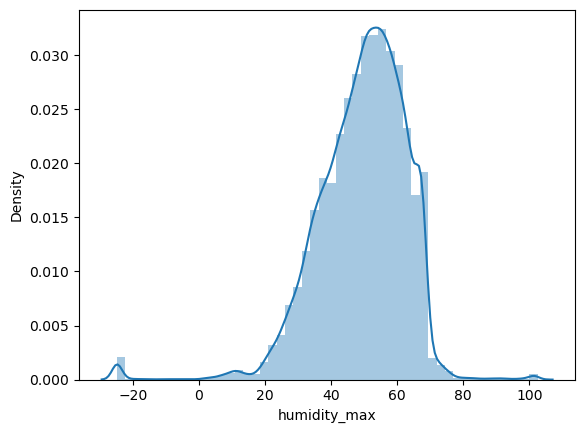

In [18]:
sns.distplot(data_filled['humidity_max'],kde=True)

#### The reason behind choosing the mean is that it is a quick and effective method in order to preserve the overall distribution of the data.

- Mean is used here as the dataset is almost normally distributed.

# 3. Use a histogram to show the distribution of the variable “location”. Explain the distribution and show how many locations are there in total. 

- A histogram is a graphical representation of the distribution of a dataset. It is a type of bar plot where each bar represents the frequency of data points that fall within specified ranges. Histograms are useful for understanding the underlying frequency distribution (shape) of a set of continuous data.

### Step 3:

- In order to plot a histogram to show the distribution of the variable “location”.

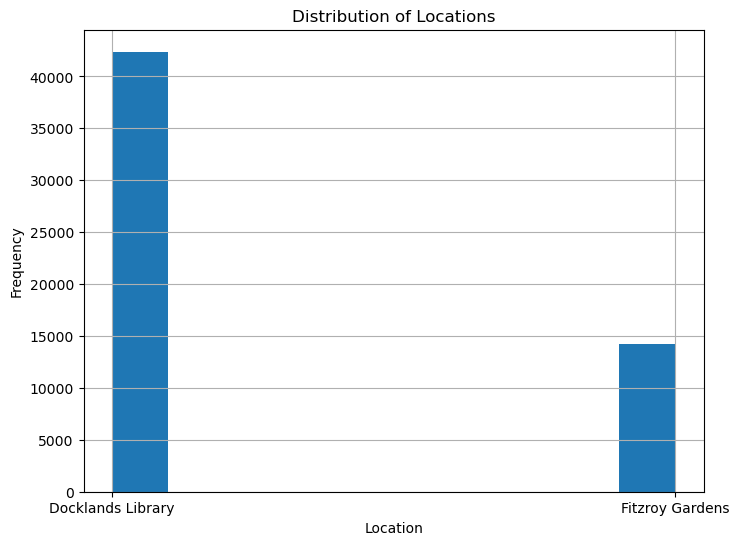

Total number of locations: 2


In [19]:
import matplotlib.pyplot as plt

# Plot histogram of 'location'
plt.figure(figsize=(8, 6))
data_filled['location'].hist()
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Count total number of locations
total_locations = data_filled['location'].nunique()
print(f"Total number of locations: {total_locations}")

#### Conclusion:

- The environmental sensors, measuring light levels, humidity and temperature are measured at 2 locations. 

- Those are **Docksland Library and Fitzroy Gardens**.

# 4. Encode the categorical variable "location" using an appropriate encoding approach and display the encoded values. Justify your selection of encoding approaches.

### Step 4: 

- To encode the categorical variable "location" using an appropriate encoding approach and display the encoded values.

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

#### OneHotEncoder is a technique used to convert categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. OneHotEncoder ensures that the model does not assume any ordinal relationship between the categories. One-hot encoding allows these algorithms to interpret the categorical data effectively, leading to improved model performance.

In [21]:
# Fit and transform the "location" column
encoded_location = encoder.fit_transform(data_filled[["location"]]).toarray()

In [22]:
# Get feature names (for scikit-learn versions 0.20 and above)
feature_names = encoder.get_feature_names_out(["location"])

# Create a DataFrame with the encoded values
encoded_df = pd.DataFrame(encoded_location, columns=feature_names)

In [23]:
# Concatenate the encoded DataFrame with the original data
data_encoded = pd.concat([data_filled, encoded_df], axis=1)

In [24]:
# Drop the original "location" column
data_encoded.drop(columns=["location"], inplace=True)

In [25]:
# Save the modified data to a new CSV file
data_encoded.to_csv("sensor-readings-modified.csv", index=False)

- This OneHotEncoder() is a encoding approach. This technique is fit and transformed to array.

- Feature names are taken from the "location" and created a DataFrame with the encoded values.

- the encoded DataFrame is Concatenated with the original data.

- Now the original "location" column is dropped and saved the **data_encoded** as **"sensor-readings-modified"**, .csv file.

# 5. Apply the min-max scaling on features "[boardtype, boardid, temp_max, temp_min, temp_avg, light_max, light_min, light_avg, humidity_min, humidity_max, humidity_avg]". Plot distribution of first six features before and after scaling. Is there any difference? Please explain.

### Step 5: 

1. To apply the min-max scaling on features "[boardtype, boardid, temp_max, temp_min, temp_avg, light_max, light_min, light_avg, humidity_min, humidity_max, humidity_avg]".

2. To Plot distribution of first six features before and after scaling.

- Min-Max scaling is chosen to normalize the features to a range of [0, 1], which helps in algorithms that require normalized input for better performance.

- Min-max scaling ensures that no single feature dominates due to its magnitude, allowing the model to learn from all features more effectively.  When features are on different scales, algorithms may take longer to converge to the optimal solution. Scaling the features helps to normalize the gradient steps, leading to faster convergence.

In [26]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [27]:
# Select features for min-max scaling
features_to_scale = [
    'boardtype', 'boardid', 'temp_max', 'temp_min', 'temp_avg',
    'light_max', 'light_min', 'light_avg', 'humidity_min', 'humidity_max', 'humidity_avg'
]

In [28]:
# Create a copy of the data to avoid modifying the original data
data_scaled = data_encoded.copy()

In [29]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Apply min-max scaling to the selected features
data_scaled[features_to_scale] = scaler.fit_transform(data_encoded[features_to_scale])

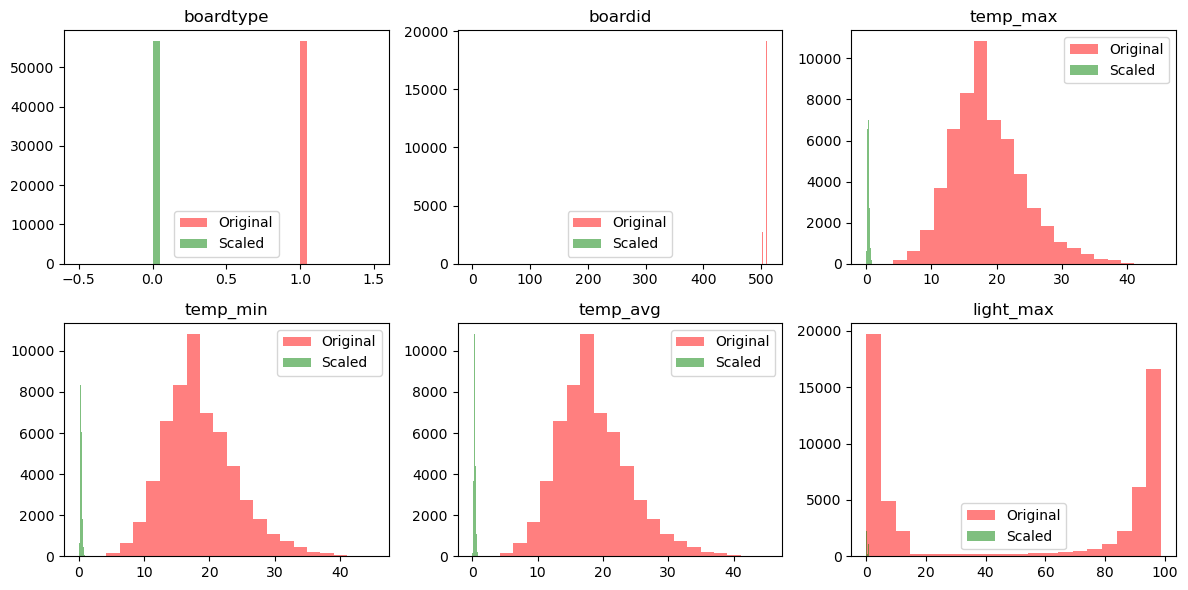

In [34]:
# Plot the distributions before and after scaling for the first six features
plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(data_encoded[features_to_scale[i]], bins=20, alpha=0.5, label='Original', color = "red")
    plt.hist(data_scaled[features_to_scale[i]], bins=20, alpha=0.5, label='Scaled', color = "green")
    plt.title(features_to_scale[i])
    plt.legend()

plt.tight_layout()
plt.show()

#### Conclusion of Step 5:

1. In the plot, you will observe that the distributions before and after scaling look the same in terms of shape and spread, but the values have been transformed to the [0, 1] range. The primary goal of min-max scaling is to bring all features to a common scale, avoiding any dominance of a particular feature due to its large value range. The plot confirms that min-max scaling has been successful in achieving this goal for the selected features.

After completing these steps, you should have the modified data saved in "sensor-readings-modified.csv" and the plot showing the distribution before and after scaling for the first six features. Make sure to upload the new CSV file as requested in your submission.

# REFERENCE:

[1] City of Melbourne, "Sensor readings, with temperature, light, humidity every 5 minutes at 8 locations (trial, 2014 to 2015)," [Online]. Available: https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t/exports/csv?lang=en&timezone=Asia%2FKolkata&use_labels=true&delimiter=%2C.